In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.shape

(3803, 17)

In [5]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,ild greens,sector 37c,0.9,5614.0,1603.0,Super Built up area 1603(148.92 sq.m.)Built Up area: 1500 sq.ft. (139.35 sq.m.),3,3,3,not available,0.0,North-East,Under Construction,"['The Esplanade Mall', 'Gurgaon Road', 'Delhi Jaipur Expressway', 'Green Field Public School', 'Sunrise University', 'K.D. Hospital', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'infinity Business Park']",NaN,"['Lift(s)', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Security / Fire Alarm', 'Swimming Pool', 'Park', 'Visitor Parking', 'Piped-gas', 'Club house / Community Center', 'Fitness Centre / GYM', 'Water softening plant', 'Rain Water Harvesting', 'Shopping Centre']"


# 1. areaWithType

In [6]:

df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3321,0.50,800.0,Super Built up area 800(74.32 sq.m.)Carpet area: 605 sq.ft. (56.21 sq.m.)
2150,1.70,1789.0,Super Built up area 1789(166.2 sq.m.)
360,1.90,1358.0,Built Up area: 1358 (126.16 sq.m.)
3272,1.33,783.0,Built Up area: 1423 (132.2 sq.m.)Carpet area: 783 sq.ft. (72.74 sq.m.)
74,2.00,2754.0,Super Built up area 2754(255.85 sq.m.)


In [7]:
def super_built_up(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
df['super_built_up_area'] = df['areaWithType'].apply(super_built_up)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['super_built_up_area']), axis=1)

df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['built_up_area']), axis=1)

df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'],x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2560,0.40,flat,569.0,Super Built up area 568.46(52.81 sq.m.),568.46,NaN,NaN
1616,1.01,flat,1750.0,Super Built up area 1750(162.58 sq.m.)Built Up area: 1475 sq.ft. (137.03 sq.m.)Carpet area: 1350 sq.ft. (125.42 sq.m.),1750.00,1475.0,1350.0
2330,2.65,flat,1950.0,Super Built up area 2215(205.78 sq.m.)Carpet area: 1950 sq.ft. (181.16 sq.m.),2215.00,NaN,1950.0
1163,1.05,flat,1895.0,Super Built up area 1895(176.05 sq.m.),1895.00,NaN,NaN
1147,0.45,flat,569.0,Carpet area: 569 (52.86 sq.m.),NaN,NaN,569.0


In [12]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [13]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,3.25,house,981.0,Plot area 109(91.14 sq.m.),NaN,NaN,NaN
9,5.50,house,300.0,Plot area 300(27.87 sq.m.),NaN,NaN,NaN
10,3.50,house,1722.0,Plot area 160,NaN,NaN,NaN
11,7.10,house,251.0,Plot area 240(22.3 sq.m.),NaN,NaN,NaN
13,3.40,house,1530.0,Plot area 170(142.14 sq.m.),NaN,NaN,NaN


In [14]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [15]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [16]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,3.25,house,981.0,Plot area 109(91.14 sq.m.),NaN,NaN,NaN
9,5.50,house,300.0,Plot area 300(27.87 sq.m.),NaN,NaN,NaN
10,3.50,house,1722.0,Plot area 160,NaN,NaN,NaN
11,7.10,house,251.0,Plot area 240(22.3 sq.m.),NaN,NaN,NaN
13,3.40,house,1530.0,Plot area 170(142.14 sq.m.),NaN,NaN,NaN


In [17]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index
all_nan_index

Int64Index([   3,    9,   10,   11,   13,   19,   24,   30,   34,   38,
            ...
            3755, 3758, 3759, 3762, 3769, 3771, 3772, 3786, 3787, 3792],
           dtype='int64', length=546)

In [18]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [19]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [20]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,3.25,house,981.0,Plot area 109(91.14 sq.m.),NaN,109.00,NaN
9,5.50,house,300.0,Plot area 300(27.87 sq.m.),NaN,300.00,NaN
10,3.50,house,1722.0,Plot area 160,NaN,160.00,NaN
11,7.10,house,251.0,Plot area 240(22.3 sq.m.),NaN,240.00,NaN
13,3.40,house,1530.0,Plot area 170(142.14 sq.m.),NaN,170.00,NaN
19,6.25,house,5400.0,Plot area 600(501.68 sq.m.),NaN,600.00,NaN
24,0.90,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
30,25.00,house,8036.0,Plot area 1000(836.13 sq.m.),NaN,1000.00,NaN
34,7.69,house,3195.0,Plot area 355(296.83 sq.m.),NaN,355.00,NaN
38,0.75,house,1095.0,Plot area 1095(101.73 sq.m.),NaN,1095.00,NaN


In [21]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area'])==9.0:
            return row['built_up_area']*9
        elif round(row['area']/row['built_up_area'])==11.0:
            return row['built_up_area']*10.7
        else:
            return row['built_up_area']
        

In [22]:
all_nan_df['built_up_area'] =all_nan_df.apply(convert_scale, axis=1)

In [23]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3,3.25,house,981.0,Plot area 109(91.14 sq.m.),NaN,981.00,NaN
9,5.50,house,300.0,Plot area 300(27.87 sq.m.),NaN,300.00,NaN
10,3.50,house,1722.0,Plot area 160,NaN,1712.00,NaN
11,7.10,house,251.0,Plot area 240(22.3 sq.m.),NaN,240.00,NaN
13,3.40,house,1530.0,Plot area 170(142.14 sq.m.),NaN,1530.00,NaN
19,6.25,house,5400.0,Plot area 600(501.68 sq.m.),NaN,5400.00,NaN
24,0.90,house,900.0,Plot area 100(83.61 sq.m.),NaN,900.00,NaN
30,25.00,house,8036.0,Plot area 1000(836.13 sq.m.),NaN,1000.00,NaN
34,7.69,house,3195.0,Plot area 355(296.83 sq.m.),NaN,3195.00,NaN
38,0.75,house,1095.0,Plot area 1095(101.73 sq.m.),NaN,1095.00,NaN


In [24]:
# update the original dataframe
df.update(all_nan_df)

In [25]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [26]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,ild greens,sector 37c,0.90,5614.0,1603.0,Super Built up area 1603(148.92 sq.m.)Built Up area: 1500 sq.ft. (139.35 sq.m.),3,3,3,not available,0.0,North-East,Under Construction,"['The Esplanade Mall', 'Gurgaon Road', 'Delhi Jaipur Expressway', 'Green Field Public School', 'Sunrise University', 'K.D. Hospital', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'infinity Business Park']",NaN,"['Lift(s)', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Security / Fire Alarm', 'Swimming Pool', 'Park', 'Visitor Parking', 'Piped-gas', 'Club house / Community Center', 'Fitness Centre / GYM', 'Water softening plant', 'Rain Water Harvesting', 'Shopping Centre']",1603.0,1500.0,NaN
1,flat,pareena coban residences,sector 99a,1.40,7010.0,1997.0,Super Built up area 1997(185.53 sq.m.),3,5,3+,not available,6.0,NaN,0 to 1 Year Old,"['Gopal Super Market', 'Little Need Super Market', 'JMS Marine Square Mall', 'Adarsh Public School', 'Basant Lal Memorial College', 'Govt School', 'Rishikul College', 'HDFC Bank ATM', 'Shri Balaji Hospital', 'Shree Krishna Hospital', 'IGI Airport', 'YES Bank', 'Bank of Baroda', 'Garhi Harsaru Junction', 'Park INN']",[],"['Swimming Pool', 'Visitor Parking']",1997.0,NaN,NaN
2,flat,hero homes,sector 104,1.75,10361.0,1689.0,Super Built up area 1689(156.91 sq.m.),3,3,3,not available,2.0,NaN,Dec 2024,"['Basai Metro Station', 'HUDA Market', 'Dwarka Expressway', 'Kings International School', 'Aryan Hospital', 'IGI Airport', 'Gurugram Railway Station']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",1689.0,NaN,NaN
3,house,dlf city phase 1,sector 26,3.25,33129.0,981.0,Plot area 109(91.14 sq.m.),3,3,3,study room,2.0,West,10+ Year Old,"['Dlf phase 1 metro station', 'Sikandarpur metro station', 'Sikanderpur metro station', 'Sikandarpur rmrg metro station', 'Mg road metro station', 'Hanuman Mandir', 'Axis bank ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Rbs ATM', 'Divine Look Clinic Centre 1', 'Lord Krishna Hospital', 'Sidhesh Hospital Gurgaon', 'Sitaram Bhartia', 'Sikka Maternity And Surgical Center', 'Uma Sanjeevani Health Centre And Hospital', 'Marwah Clinic', 'Surgi Center Clinic', 'Religare Wellness', '98.4', 'Guardian', 'Chikitsa', 'Guardian Pharmacy', 'Emaar Business Park', 'Axis bank', 'Hdfc bank', 'Lord krishna bank', 'Indusind bank', 'Abn amro bank', 'Kotak mahindra bank', 'Hsbc bank', 'Axis bank', 'PVR Cinames', 'DT Cinemas', 'PVR Metropolitan', 'Food Court', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Belgian Waffle', 'Drunken Monkey', 'CCD', 'NutrioBox Gurugram', 'Barbecue Grill', 'Pan Bangkok', 'Bahrisons library']","['5 Fan', '16 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']",NaN,981.0,NaN
4,flat,godrej,sector 79,1.41,9000.0,1567.0,Carpet area: 1572 (146.04 sq.m.),2,2,3,study room,3.0,NaN,0 to 1 Year Old,"['Vatika Town Square-INXT', 'Naurangpur Road', 'NH 48', 'Euro International School', 'Gurugram University', 'Miracles Apollo Cradle', 'Nouveau Medics Multispeciality OPD', 'Indira Gandhi Intl Airport', 'Heritage Village Resort & Spa', 'Nakhrola Stadium']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden

# 2.additionalRoom

In [27]:
df.shape

(3803, 20)

In [28]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,store room,study 

In [29]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)
    

In [30]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
51,"study room,servant room",1,1,0,0,0
105,study room,1,0,0,0,0
1872,servant room,0,1,0,0,0
3117,"pooja room,study room,servant room",1,1,0,1,0
2144,not available,0,0,0,0,0


In [31]:
df.shape

(3803, 25)

In [32]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,ild greens,sector 37c,0.90,5614.0,1603.0,Super Built up area 1603(148.92 sq.m.)Built Up area: 1500 sq.ft. (139.35 sq.m.),3,3,3,not available,0.0,North-East,Under Construction,"['The Esplanade Mall', 'Gurgaon Road', 'Delhi Jaipur Expressway', 'Green Field Public School', 'Sunrise University', 'K.D. Hospital', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'infinity Business Park']",NaN,"['Lift(s)', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Security / Fire Alarm', 'Swimming Pool', 'Park', 'Visitor Parking', 'Piped-gas', 'Club house / Community Center', 'Fitness Centre / GYM', 'Water softening plant', 'Rain Water Harvesting', 'Shopping Centre']",1603.0,1500.0,NaN,0,0,0,0,0
1,flat,pareena coban residences,sector 99a,1.40,7010.0,1997.0,Super Built up area 1997(185.53 sq.m.),3,5,3+,not available,6.0,NaN,0 to 1 Year Old,"['Gopal Super Market', 'Little Need Super Market', 'JMS Marine Square Mall', 'Adarsh Public School', 'Basant Lal Memorial College', 'Govt School', 'Rishikul College', 'HDFC Bank ATM', 'Shri Balaji Hospital', 'Shree Krishna Hospital', 'IGI Airport', 'YES Bank', 'Bank of Baroda', 'Garhi Harsaru Junction', 'Park INN']",[],"['Swimming Pool', 'Visitor Parking']",1997.0,NaN,NaN,0,0,0,0,0
2,flat,hero homes,sector 104,1.75,10361.0,1689.0,Super Built up area 1689(156.91 sq.m.),3,3,3,not available,2.0,NaN,Dec 2024,"['Basai Metro Station', 'HUDA Market', 'Dwarka Expressway', 'Kings International School', 'Aryan Hospital', 'IGI Airport', 'Gurugram Railway Station']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",1689.0,NaN,NaN,0,0,0,0,0
3,house,dlf city phase 1,sector 26,3.25,33129.0,981.0,Plot area 109(91.14 sq.m.),3,3,3,study room,2.0,West,10+ Year Old,"['Dlf phase 1 metro station', 'Sikandarpur metro station', 'Sikanderpur metro station', 'Sikandarpur rmrg metro station', 'Mg road metro station', 'Hanuman Mandir', 'Axis bank ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Rbs ATM', 'Divine Look Clinic Centre 1', 'Lord Krishna Hospital', 'Sidhesh Hospital Gurgaon', 'Sitaram Bhartia', 'Sikka Maternity And Surgical Center', 'Uma Sanjeevani Health Centre And Hospital', 'Marwah Clinic', 'Surgi Center Clinic', 'Religare Wellness', '98.4', 'Guardian', 'Chikitsa', 'Guardian Pharmacy', 'Emaar Business Park', 'Axis bank', 'Hdfc bank', 'Lord krishna bank', 'Indusind bank', 'Abn amro bank', 'Kotak mahindra bank', 'Hsbc bank', 'Axis bank', 'PVR Cinames', 'DT Cinemas', 'PVR Metropolitan', 'Food Court', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Belgian Waffle', 'Drunken Monkey', 'CCD', 'NutrioBox Gurugram', 'Barbecue Grill', 'Pan Bangkok', 'Bahrisons library']","['5 Fan', '16 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']",NaN,981.0,NaN,1,0,0,0,0
4,flat,godrej,sector 79,1.41,9000.0,1567.0,Carpet area: 1572 (146.04 sq.m.),2,2,3,study room,3.0,NaN,0 to 1 Year Old,"['Vatika Town Square-INXT', 'Naurangpur Road', 'NH 48', 'Euro International School', 'Gurugram University', 'Miracles Apollo Cradle', 'Nouveau Medics Multispeciality OPD', 'Indira Gandhi Intl Airport', 'Heritage Village Resort & Spa', 'Nakhr

# 3.agePossession

In [33]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Dec 2025                 7
Aug 2023                 7
Jun 2024                 7
Nov 2023                 5
Oct 2023                 4
By 2025                  4
Aug 2024                 4
Sep 2023                 4
Jul 2024                 4
Feb 2024                 3
May 2024                 3
Nov 2024                 3
Jan 2025                 3
Sep 2025                 2
Apr 2026                 2
Oct 2025                 2
Jul 2027                 2
Aug 2025                 2
Jul 2025                 2
Mar 2025                 2
Jan 2026                 2
Dec 2026                 2
B

In [34]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [35]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [36]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: agePossession, dtype: int64

In [37]:
df.shape

(3803, 25)

In [38]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,ild greens,sector 37c,0.90,5614.0,1603.0,Super Built up area 1603(148.92 sq.m.)Built Up area: 1500 sq.ft. (139.35 sq.m.),3,3,3,not available,0.0,North-East,Under Construction,"['The Esplanade Mall', 'Gurgaon Road', 'Delhi Jaipur Expressway', 'Green Field Public School', 'Sunrise University', 'K.D. Hospital', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'infinity Business Park']",NaN,"['Lift(s)', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Security / Fire Alarm', 'Swimming Pool', 'Park', 'Visitor Parking', 'Piped-gas', 'Club house / Community Center', 'Fitness Centre / GYM', 'Water softening plant', 'Rain Water Harvesting', 'Shopping Centre']",1603.0,1500.0,NaN,0,0,0,0,0
1,flat,pareena coban residences,sector 99a,1.40,7010.0,1997.0,Super Built up area 1997(185.53 sq.m.),3,5,3+,not available,6.0,NaN,New Property,"['Gopal Super Market', 'Little Need Super Market', 'JMS Marine Square Mall', 'Adarsh Public School', 'Basant Lal Memorial College', 'Govt School', 'Rishikul College', 'HDFC Bank ATM', 'Shri Balaji Hospital', 'Shree Krishna Hospital', 'IGI Airport', 'YES Bank', 'Bank of Baroda', 'Garhi Harsaru Junction', 'Park INN']",[],"['Swimming Pool', 'Visitor Parking']",1997.0,NaN,NaN,0,0,0,0,0
2,flat,hero homes,sector 104,1.75,10361.0,1689.0,Super Built up area 1689(156.91 sq.m.),3,3,3,not available,2.0,NaN,Under Construction,"['Basai Metro Station', 'HUDA Market', 'Dwarka Expressway', 'Kings International School', 'Aryan Hospital', 'IGI Airport', 'Gurugram Railway Station']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",1689.0,NaN,NaN,0,0,0,0,0
3,house,dlf city phase 1,sector 26,3.25,33129.0,981.0,Plot area 109(91.14 sq.m.),3,3,3,study room,2.0,West,Old Property,"['Dlf phase 1 metro station', 'Sikandarpur metro station', 'Sikanderpur metro station', 'Sikandarpur rmrg metro station', 'Mg road metro station', 'Hanuman Mandir', 'Axis bank ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Rbs ATM', 'Divine Look Clinic Centre 1', 'Lord Krishna Hospital', 'Sidhesh Hospital Gurgaon', 'Sitaram Bhartia', 'Sikka Maternity And Surgical Center', 'Uma Sanjeevani Health Centre And Hospital', 'Marwah Clinic', 'Surgi Center Clinic', 'Religare Wellness', '98.4', 'Guardian', 'Chikitsa', 'Guardian Pharmacy', 'Emaar Business Park', 'Axis bank', 'Hdfc bank', 'Lord krishna bank', 'Indusind bank', 'Abn amro bank', 'Kotak mahindra bank', 'Hsbc bank', 'Axis bank', 'PVR Cinames', 'DT Cinemas', 'PVR Metropolitan', 'Food Court', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Belgian Waffle', 'Drunken Monkey', 'CCD', 'NutrioBox Gurugram', 'Barbecue Grill', 'Pan Bangkok', 'Bahrisons library']","['5 Fan', '16 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']",NaN,981.0,NaN,1,0,0,0,0
4,flat,godrej,sector 79,1.41,9000.0,1567.0,Carpet area: 1572 (146.04 sq.m.),2,2,3,study room,3.0,NaN,New Property,"['Vatika Town Square-INXT', 'Naurangpur Road', 'NH 48', 'Euro International School', 'Gurugram University', 'Miracles Apollo Cradle', 'Nouveau Medics Multispeciality OPD', 'Indira Gandhi Intl Airport', 'Heritage Village Resort & Spa', 'N

# 4.furnishDetails

In [39]:
df.shape

(3803, 25)

In [40]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1999,"['2 Wardrobe', '1 Exhaust Fan', '4 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2953,NaN,"['Intercom Facility', 'Lift(s)', 'Park']"
2037,"['2 Wardrobe', '4 Fan', '2 Geyser', '15 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN
2944,NaN,NaN
10,NaN,NaN


In [41]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [42]:
furnishings_df.shape

(3803, 19)

In [43]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)
furnishings_df.sample(5)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,AC,Modular Kitchen,Water Purifier,Wardrobe,Chimney,TV,Microwave,Dining Table,Sofa,Fridge,Fan,Light,Bed,Geyser,Exhaust Fan,Washing Machine,Curtains,Stove
2711,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
3042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1802,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2109,1,1,1,2,0,0,0,0,1,1,3,4,0,1,1,0,1,0


In [44]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [46]:
wcss_reduced =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

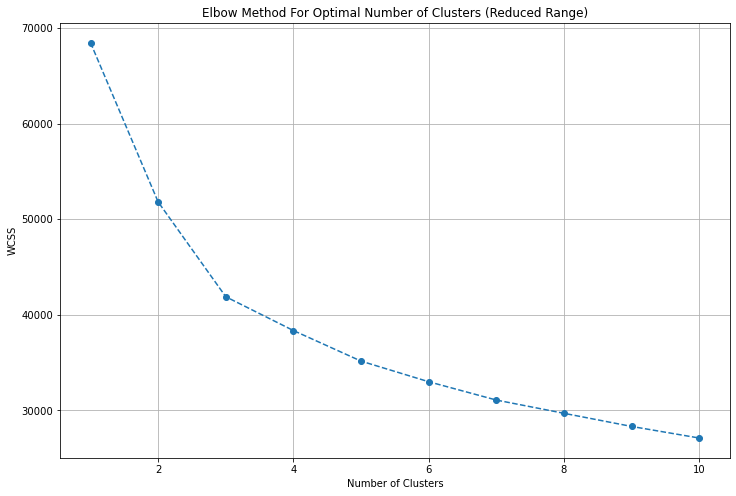

In [47]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [48]:
n_cluster = 3
kmeans = KMeans(n_clusters=n_cluster, random_state=42)
kmeans.fit(scaled_data)
cluster_assignment = kmeans.predict(scaled_data)

In [49]:
cluster_assignment

array([0, 0, 0, ..., 2, 0, 0])

In [50]:
df = df.iloc[:,:-18]

In [51]:
df['furnishing_type']=cluster_assignment

In [52]:
df[['furnishDetails','furnishing_type']].sample(5)

,furnishDetails,furnishing_type
2259,NaN,0
1158,[],0
1939,"['2 Fan', '1 Fridge', '1 Geyser', '1 Stove', '4 Light', '1 Chimney', '1 Modular Kitchen', '2 AC', '2 TV', '1 Curtains', '1 Bed', '1 Wardrobe', '1 Sofa', '1 Microwave', '1 Washing Machine', 'No Dining Table', 'No Exhaust Fan', 'No Water Purifier']",2
1901,NaN,0
575,"['3 Wardrobe', '1 Water Purifier', '5 Fan', '1 Exhaust Fan', '5 Geyser', '12 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']",1


In [53]:
df.shape

(3803, 26)


# 5.features

In [54]:
df[['features']].sample(5)

,features
2621,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
732,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
764,"['Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Bank Attached Property', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Shopping Centre']"
3394,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
357,NaN


In [55]:
df['features'].isnull().sum()

635

In [56]:
df.shape

(3803, 26)

In [57]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,flat,ild greens,sector 37c,0.90,5614.0,1603.0,Super Built up area 1603(148.92 sq.m.)Built Up area: 1500 sq.ft. (139.35 sq.m.),3,3,3,not available,0.0,North-East,Under Construction,"['The Esplanade Mall', 'Gurgaon Road', 'Delhi Jaipur Expressway', 'Green Field Public School', 'Sunrise University', 'K.D. Hospital', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'infinity Business Park']",NaN,"['Lift(s)', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Security / Fire Alarm', 'Swimming Pool', 'Park', 'Visitor Parking', 'Piped-gas', 'Club house / Community Center', 'Fitness Centre / GYM', 'Water softening plant', 'Rain Water Harvesting', 'Shopping Centre']",1603.0,1500.0,NaN,0,0,0,0,0,0
1,flat,pareena coban residences,sector 99a,1.40,7010.0,1997.0,Super Built up area 1997(185.53 sq.m.),3,5,3+,not available,6.0,NaN,New Property,"['Gopal Super Market', 'Little Need Super Market', 'JMS Marine Square Mall', 'Adarsh Public School', 'Basant Lal Memorial College', 'Govt School', 'Rishikul College', 'HDFC Bank ATM', 'Shri Balaji Hospital', 'Shree Krishna Hospital', 'IGI Airport', 'YES Bank', 'Bank of Baroda', 'Garhi Harsaru Junction', 'Park INN']",[],"['Swimming Pool', 'Visitor Parking']",1997.0,NaN,NaN,0,0,0,0,0,0
2,flat,hero homes,sector 104,1.75,10361.0,1689.0,Super Built up area 1689(156.91 sq.m.),3,3,3,not available,2.0,NaN,Under Construction,"['Basai Metro Station', 'HUDA Market', 'Dwarka Expressway', 'Kings International School', 'Aryan Hospital', 'IGI Airport', 'Gurugram Railway Station']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",1689.0,NaN,NaN,0,0,0,0,0,0
3,house,dlf city phase 1,sector 26,3.25,33129.0,981.0,Plot area 109(91.14 sq.m.),3,3,3,study room,2.0,West,Old Property,"['Dlf phase 1 metro station', 'Sikandarpur metro station', 'Sikanderpur metro station', 'Sikandarpur rmrg metro station', 'Mg road metro station', 'Hanuman Mandir', 'Axis bank ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Rbs ATM', 'Divine Look Clinic Centre 1', 'Lord Krishna Hospital', 'Sidhesh Hospital Gurgaon', 'Sitaram Bhartia', 'Sikka Maternity And Surgical Center', 'Uma Sanjeevani Health Centre And Hospital', 'Marwah Clinic', 'Surgi Center Clinic', 'Religare Wellness', '98.4', 'Guardian', 'Chikitsa', 'Guardian Pharmacy', 'Emaar Business Park', 'Axis bank', 'Hdfc bank', 'Lord krishna bank', 'Indusind bank', 'Abn amro bank', 'Kotak mahindra bank', 'Hsbc bank', 'Axis bank', 'PVR Cinames', 'DT Cinemas', 'PVR Metropolitan', 'Food Court', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Belgian Waffle', 'Drunken Monkey', 'CCD', 'NutrioBox Gurugram', 'Barbecue Grill', 'Pan Bangkok', 'Bahrisons library']","['5 Fan', '16 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Park', 'Visitor Parking', 'Security Personnel', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']",NaN,981.0,NaN,1,0,0,0,0,0
4,flat,godrej,sector 79,1.41,9000.0,1567.0,Carpet area: 1572 (146.04 sq.m.),2,2,3,study room,3.0,NaN,New Property,"['Vatika Town Square-INXT', 'Naurangpur Road', 'NH 48', 'Euro International School', 'Gurugram University', 'Miracles Apollo Cradle', 'Nouveau Medics Multispeciality OPD', 'Indira Gandhi Intl Airport', 'Heritage V

In [58]:
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [59]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()


In [60]:
temp_df = df[df['features'].isnull()]
temp_df.shape

(635, 26)

In [61]:
x = temp_df.merge(app_df, left_on='society', right_on='PropertyName', how='left')['TopFacilities']
x.index, x.values

(Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             625, 626, 627, 628, 629, 630, 631, 632, 633, 634],
            dtype='int64', length=635),
 array([nan, nan, nan, nan, nan, nan, nan,
        "['Milk Booth', 'Swimming Pool', 'Bar/Chill-Out Lounge', 'Cigar Lounge', 'Changing Area', 'School', 'Aerobics Centre', 'Card Room', 'Restaurant']",
        nan, nan, nan,
        "['Mini Theatre', 'Natural Pond', 'Swimming Pool', 'Bar/Chill-Out Lounge', 'Flower Garden', 'School', 'Volley Ball Court', 'RO System', 'Visitors Parking']",
        nan,
        "['Manicured Garden', 'Swimming Pool', 'School', 'Salon', 'Spa', 'Grocery Shop', 'Billiards', 'Lawn Tennis Court', 'Basketball Court']",
        nan, nan, nan, nan, nan,
        "['Bus Shelter', 'Infinity Pool', 'Swimming Pool', 'Bar/Chill-Out Lounge', 'Reflexology Park', 'Aerobics Centre', 'Restaurant', 'Terrace Garden', 'High Speed Elevators']",
        nan, nan, nan, nan, nan,
        "['Swimming Pool

In [62]:
temp_df.index

Int64Index([   8,   10,   25,   26,   30,   44,   45,   48,   53,   54,
            ...
            3758, 3760, 3762, 3771, 3776, 3781, 3783, 3784, 3793, 3801],
           dtype='int64', length=635)

In [63]:
df.loc[temp_df.index,'features'] = x.values

In [64]:
df['features'].isnull().sum()

481

In [65]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [66]:
features_binary_df.head()

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0


In [67]:
features_binary_df.shape

(3803, 130)

In [68]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

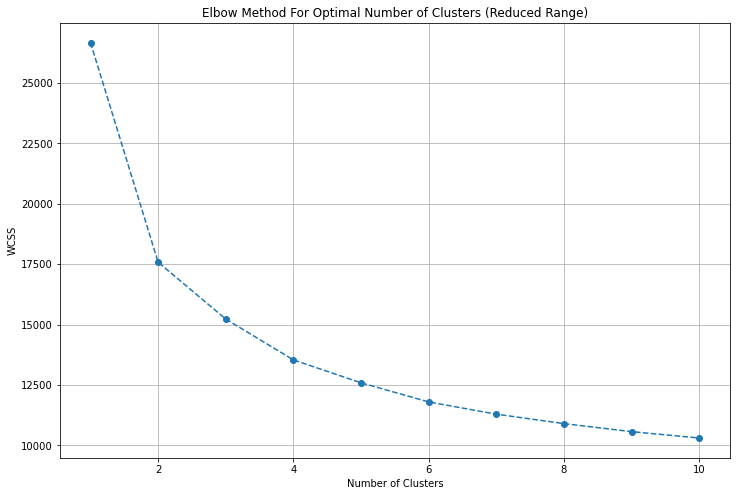

In [69]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [70]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
# luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [71]:
list(weights.keys())

['24/7 Power Backup',
 '24/7 Water Supply',
 '24x7 Security',
 'ATM',
 'Aerobics Centre',
 'Airy Rooms',
 'Amphitheatre',
 'Badminton Court',
 'Banquet Hall',
 'Bar/Chill-Out Lounge',
 'Barbecue',
 'Basketball Court',
 'Billiards',
 'Bowling Alley',
 'Business Lounge',
 'CCTV Camera Security',
 'Cafeteria',
 'Car Parking',
 'Card Room',
 'Centrally Air Conditioned',
 'Changing Area',
 "Children's Play Area",
 'Cigar Lounge',
 'Clinic',
 'Club House',
 'Concierge Service',
 'Conference room',
 'Creche/Day care',
 'Cricket Pitch',
 'Doctor on Call',
 'Earthquake Resistant',
 'Entrance Lobby',
 'False Ceiling Lighting',
 'Feng Shui / Vaastu Compliant',
 'Fire Fighting Systems',
 'Fitness Centre / GYM',
 'Flower Garden',
 'Food Court',
 'Foosball',
 'Football',
 'Fountain',
 'Gated Community',
 'Golf Course',
 'Grocery Shop',
 'Gymnasium',
 'High Ceiling Height',
 'High Speed Elevators',
 'Infinity Pool',
 'Intercom Facility',
 'Internal Street Lights',
 'Internet/wi-fi connectivity',
 'Ja

In [72]:
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [73]:
df['luxury_score'] = luxury_score

In [74]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,ild greens,sector 37c,0.90,5614.0,1603.0,Super Built up area 1603(148.92 sq.m.)Built Up area: 1500 sq.ft. (139.35 sq.m.),3,3,3,not available,0.0,North-East,Under Construction,"['The Esplanade Mall', 'Gurgaon Road', 'Delhi Jaipur Expressway', 'Green Field Public School', 'Sunrise University', 'K.D. Hospital', 'Indira Gandhi International Airport', 'Gurgaon Railway Station', 'infinity Business Park']",NaN,"['Lift(s)', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Security / Fire Alarm', 'Swimming Pool', 'Park', 'Visitor Parking', 'Piped-gas', 'Club house / Community Center', 'Fitness Centre / GYM', 'Water softening plant', 'Rain Water Harvesting', 'Shopping Centre']",1603.0,1500.0,NaN,0,0,0,0,0,0,"[Lift(s), Feng Shui / Vaastu Compliant, Intercom Facility, Security / Fire Alarm, Swimming Pool, Park, Visitor Parking, Piped-gas, Club house / Community Center, Fitness Centre / GYM, Water softening plant, Rain Water Harvesting, Shopping Centre]",66
1,flat,pareena coban residences,sector 99a,1.40,7010.0,1997.0,Super Built up area 1997(185.53 sq.m.),3,5,3+,not available,6.0,NaN,New Property,"['Gopal Super Market', 'Little Need Super Market', 'JMS Marine Square Mall', 'Adarsh Public School', 'Basant Lal Memorial College', 'Govt School', 'Rishikul College', 'HDFC Bank ATM', 'Shri Balaji Hospital', 'Shree Krishna Hospital', 'IGI Airport', 'YES Bank', 'Bank of Baroda', 'Garhi Harsaru Junction', 'Park INN']",[],"['Swimming Pool', 'Visitor Parking']",1997.0,NaN,NaN,0,0,0,0,0,0,"[Swimming Pool, Visitor Parking]",15
2,flat,hero homes,sector 104,1.75,10361.0,1689.0,Super Built up area 1689(156.91 sq.m.),3,3,3,not available,2.0,NaN,Under Construction,"['Basai Metro Station', 'HUDA Market', 'Dwarka Expressway', 'Kings International School', 'Aryan Hospital', 'IGI Airport', 'Gurugram Railway Station']",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']",1689.0,NaN,NaN,0,0,0,0,0,0,"[Power Back-up, Intercom Facility, Lift(s), Swimming Pool, Internet/wi-fi connectivity, Fitness Centre / GYM, Club house / Community Center]",30
3,house,dlf city phase 1,sector 26,3.25,33129.0,981.0,Plot area 109(91.14 sq.m.),3,3,3,study room,2.0,West,Old Property,"['Dlf phase 1 metro station', 'Sikandarpur metro station', 'Sikanderpur metro station', 'Sikandarpur rmrg metro station', 'Mg road metro station', 'Hanuman Mandir', 'Axis bank ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Rbs ATM', 'Divine Look Clinic Centre 1', 'Lord Krishna Hospital', 'Sidhesh Hospital Gurgaon', 'Sitaram Bhartia', 'Sikka Maternity And Surgical Center', 'Uma Sanjeevani Health Centre And Hospital', 'Marwah Clinic', 'Surgi Center Clinic', 'Religare Wellness', '98.4', 'Guardian', 'Chikitsa', 'Guardian Pharmacy', 'Emaar Business Park', 'Axis bank', 'Hdfc bank', 'Lord krishna bank', 'Indusind bank', 'Abn amro bank', 'Kotak mahindra bank', 'Hsbc bank', 'Axis bank', 'PVR Cinames', 'DT Cinemas', 'PVR Metropolitan', 'Food Court', 'Nowhere Brewpub and cafe', 'Fat', 'Dighent cafe', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Belgian Waffle', 'Drunken Monkey', 'CCD', 'NutrioBox Gurugram', 'Barbecue Grill', 'Pan Bangkok', 'Bahrisons library']","['5 Fan', '16 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Park',

In [75]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [76]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1777,flat,smart world gems,sector 89,1.20,8432.0,1423.0,Built Up area: 1423 (132.2 sq.m.),3,3,2,3.0,East,New Property,NaN,1423.0,NaN,1,0,0,0,1,0,37
644,flat,dlf the ultima,sector 81,2.30,14603.0,1575.0,Super Built up area 2100(195.1 sq.m.)Carpet area: 1575 sq.ft. (146.32 sq.m.),3,4,3+,27.0,East,Relatively New,2100.0,NaN,1575.0,0,1,0,0,0,1,119
3744,flat,central park flower valley,sector 33,2.30,12777.0,1800.0,Carpet area: 1800 (167.23 sq.m.),4,4,3+,5.0,North-East,New Property,NaN,NaN,1800.0,0,1,0,1,0,0,42
2924,flat,the close south,sector 50,3.25,12810.0,2537.0,Carpet area: 2537 (235.7 sq.m.),3,4,3+,4.0,South-East,Old Property,NaN,NaN,2537.0,0,1,0,0,0,1,135
3425,flat,sare crescent parc royal greens phase 1,sector 92,0.95,5007.0,1897.0,Super Built up area 1897(176.24 sq.m.),4,5,3+,4.0,NaN,Moderately Old,1897.0,NaN,NaN,0,1,0,0,0,0,37


In [77]:
df.shape

(3803, 23)

In [78]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)